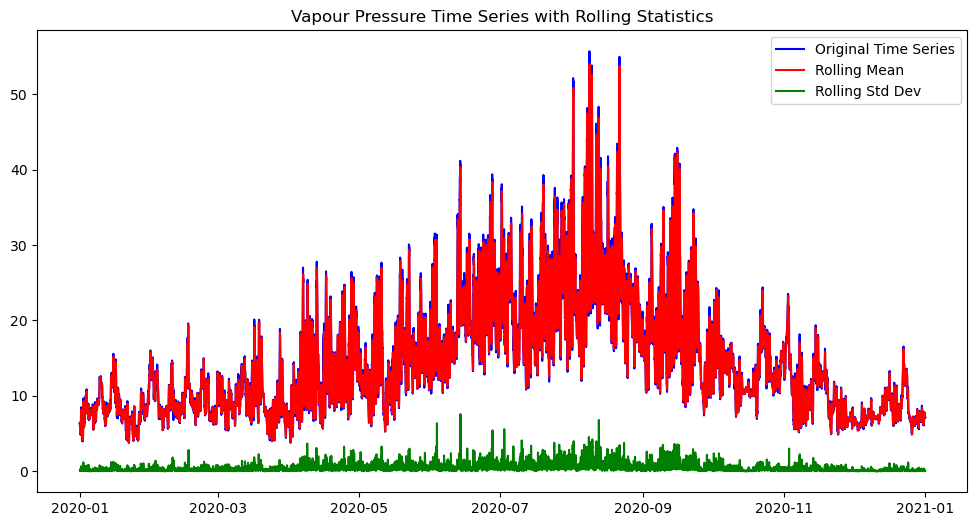

Augmented Dickey-Fuller Test:
Test Statistic: -9.397783549610486
p-value: 6.305834826625592e-16
Critical Values: {'1%': -3.43047423996295, '5%': -2.8615949115726993, '10%': -2.5667992276035014}
The data is stationary (Reject null hypothesis).
--------------------------------------------------
KPSS Test:
Test Statistic: 7.915403597435272
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The data is non-stationary (Reject null hypothesis).
--------------------------------------------------


C:\Users\harsh\AppData\Local\Temp\ipykernel_1904\1699447729.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags='auto')


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

# Load the weather dataset
df = pd.read_csv(r"C:\Users\harsh\Downloads\cleaned_weather.csv", parse_dates=['date'], index_col='date')


time_series = df['VPmax']

# Function to perform Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("Augmented Dickey-Fuller Test:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("The data is stationary (Reject null hypothesis).")
    else:
        print("The data is non-stationary (Fail to reject null hypothesis).")
    print("-" * 50)

# Function to perform KPSS Test
def kpss_test(series):
    result = kpss(series, regression='c', nlags='auto')
    print("KPSS Test:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[3]}")
    if result[1] > 0.05:
        print("The data is stationary (Fail to reject null hypothesis).")
    else:
        print("The data is non-stationary (Reject null hypothesis).")
    print("-" * 50)

# Plot the time series with rolling mean and standard deviation
plt.figure(figsize=(12,6))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(time_series.rolling(window=12).mean(), label='Rolling Mean', color='red')
plt.plot(time_series.rolling(window=12).std(), label='Rolling Std Dev', color='green')
plt.title('Vapour Pressure Time Series with Rolling Statistics')
plt.legend()
plt.show()

# Apply Stationarity Tests
adf_test(time_series)
kpss_test(time_series)
